In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('image_bins_stats_lungs2.csv')
data.shape

(2694, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_normal_1.png,5822,14402,0,9189,10538,0,11831,13754,86.982480,...,30.9217012,27.556681,26.125116,0.0,12.668177,19.678833,0.0,42.325143,33.029938,1
1,transformed_image_normal_2.png,6325,11758,0,10893,13314,0,8460,14786,86.937708,...,32.45653958,30.429971,21.410499,0.0,9.701043,16.311605,0.0,41.183742,36.344060,1
2,transformed_image_normal_3.png,5911,15666,0,9025,13587,0,8205,13142,76.833362,...,32.04297751,31.149385,23.374875,0.0,12.936013,17.187983,0.0,45.580706,35.631835,1
3,transformed_image_normal_4.png,5688,15515,0,8941,10462,0,11009,13921,73.869726,...,29.69319943,31.537897,22.614153,0.0,11.457708,15.659193,0.0,42.081886,32.843335,1
4,transformed_image_normal_5.png,6101,12231,0,10258,14797,0,7655,14494,87.165219,...,32.21430004,31.326113,21.152459,0.0,12.285766,13.344069,0.0,42.956341,36.139280,1


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,5822,14402,0,9189,10538,0,11831,13754,86.982480,4.430912,...,30.9217012,27.556681,26.125116,0.0,12.668177,19.678833,0.0,42.325143,33.029938,1
1,6325,11758,0,10893,13314,0,8460,14786,86.937708,5.183279,...,32.45653958,30.429971,21.410499,0.0,9.701043,16.311605,0.0,41.183742,36.344060,1
2,5911,15666,0,9025,13587,0,8205,13142,76.833362,2.389570,...,32.04297751,31.149385,23.374875,0.0,12.936013,17.187983,0.0,45.580706,35.631835,1
3,5688,15515,0,8941,10462,0,11009,13921,73.869726,1.710925,...,29.69319943,31.537897,22.614153,0.0,11.457708,15.659193,0.0,42.081886,32.843335,1
4,6101,12231,0,10258,14797,0,7655,14494,87.165219,5.596517,...,32.21430004,31.326113,21.152459,0.0,12.285766,13.344069,0.0,42.956341,36.139280,1


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','rskew_bins0','rskew_bins1','rskew_bins2','rskew_bins3','rskew_bins4','rskew_bins5','rskew_bins6','rskew_bins7','gstd_bins0','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,5822.0,14402.0,0.0,9189.0,10538.0,0.0,11831.0,13754.0,86.982480,4.430912,...,30.921701,27.556681,26.125116,0.000000,12.668177,19.678833,0.000000,42.325143,33.029938,1.0
1,6325.0,11758.0,0.0,10893.0,13314.0,0.0,8460.0,14786.0,86.937708,5.183279,...,32.456540,30.429971,21.410499,0.000000,9.701043,16.311605,0.000000,41.183742,36.344060,1.0
2,5911.0,15666.0,0.0,9025.0,13587.0,0.0,8205.0,13142.0,76.833362,2.389570,...,32.042978,31.149385,23.374875,0.000000,12.936013,17.187983,0.000000,45.580706,35.631835,1.0
3,5688.0,15515.0,0.0,8941.0,10462.0,0.0,11009.0,13921.0,73.869726,1.710925,...,29.693199,31.537897,22.614153,0.000000,11.457708,15.659193,0.000000,42.081886,32.843335,1.0
4,6101.0,12231.0,0.0,10258.0,14797.0,0.0,7655.0,14494.0,87.165219,5.596517,...,32.214300,31.326113,21.152459,0.000000,12.285766,13.344069,0.000000,42.956341,36.139280,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,9870.0,10436.0,13.0,9558.0,9764.0,0.0,16080.0,9815.0,104.708207,27.440974,...,28.826381,16.609479,32.541509,10.841782,18.263777,29.591836,0.000000,43.584547,43.219779,2.0
2690,5946.0,14026.0,1.0,11041.0,12415.0,0.0,7886.0,14221.0,74.044736,1.607016,...,39.246127,30.936390,21.337923,0.000000,9.706518,17.877323,0.000000,45.339391,32.611797,2.0
2691,7330.0,8408.0,6.0,10811.0,18521.0,2.0,6699.0,13759.0,112.515416,7.136774,...,28.790502,42.515393,18.625921,11.891740,14.170267,3.991819,0.000000,36.311970,41.914116,2.0
2692,7630.0,16431.0,1.0,9530.0,3413.0,3.0,17843.0,10685.0,73.122412,24.310145,...,37.426827,20.622111,29.148814,0.000000,20.197666,31.678731,4.769168,50.967873,38.781249,2.0


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1878, 104), (805, 104))

In [8]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

(array([3.09973137e+00, 1.44157726e+00, 4.85401101e+01, 4.40809978e-01,
        5.54848427e+01, 2.55627741e-01, 1.76054866e-02, 6.63092512e+01,
        2.15756342e+01, 6.53412092e-01, 7.31551304e+01, 1.67102192e+00,
        1.78241634e+02, 1.24140637e+01, 4.63673414e+01, 3.20458765e+01,
        9.13668484e+01, 1.54125448e+01, 7.75531157e+01, 4.03943045e+01,
        5.60659710e+01, 3.72167947e+00, 9.39009093e+01, 1.33055197e+01,
        1.03573105e+02, 1.51549348e+01, 7.00777098e+01, 3.52935399e+01,
        4.69854519e+01, 5.22456538e+00, 8.23158122e+01, 1.28361994e+01,
        1.22551889e+02, 1.34253863e+01, 6.62276320e+01, 3.02787007e+01,
        3.90810218e+01, 5.86111562e+00, 6.87896616e+01, 1.40823895e+01,
        1.08862090e+02, 6.39511147e+01, 8.52054745e+01, 1.23277179e+02,
        1.24453993e+01, 1.44502485e+01, 4.72914712e+00, 8.78932391e+01,
        2.88176570e+02, 5.63531569e+01, 7.72949798e+01, 2.81867046e+00,
        5.23323261e+00, 3.23401545e-01, 3.32007069e+01, 9.756966

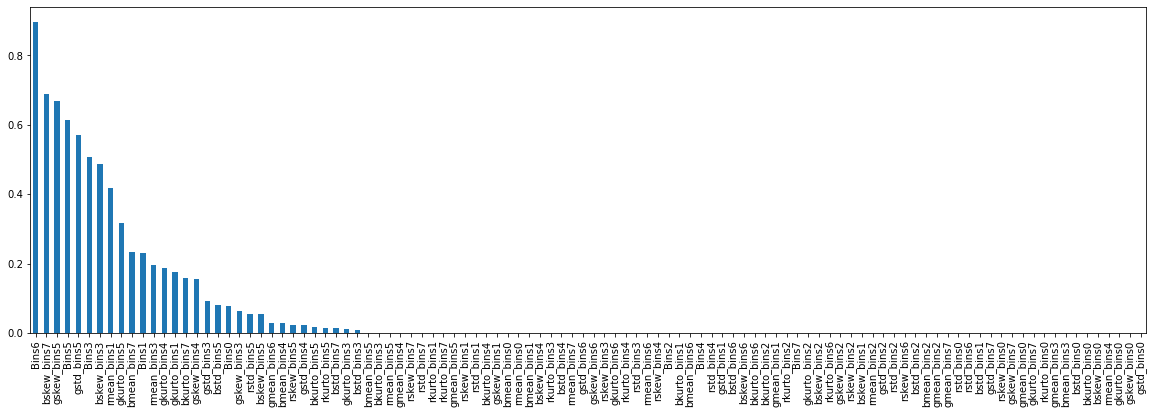

In [9]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [10]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['rmean_bins4', 'rstd_bins0', 'rstd_bins6', 'rskew_bins0',
       'rkurto_bins0', 'gmean_bins0', 'gmean_bins2', 'gmean_bins3',
       'gmean_bins7', 'gstd_bins0', 'gstd_bins7', 'gskew_bins0', 'gskew_bins7',
       'gkurto_bins0', 'gkurto_bins7', 'bmean_bins3', 'bstd_bins0',
       'bstd_bins1', 'bskew_bins0', 'bkurto_bins0'],
      dtype='object')

In [11]:
# I keep a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [12]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  39


In [13]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1878, 65), (805, 65))

In [14]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [15]:
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# capture selected feature names
features_to_keep = X_train.columns[sel_.get_support()]

# select features
X_train_anova = sel_.transform(X_train)
X_test_anova = sel_.transform(X_test)

# numpy array to dataframe
X_train_anova = pd.DataFrame(X_train_anova)
X_train_anova.columns = features_to_keep

X_test_anova = pd.DataFrame(X_test_anova)
X_test_anova.columns = features_to_keep

X_train_anova.shape, X_test_anova.shape

((1878, 20), (805, 20))

In [16]:
features_to_keep

Index(['rmean_bins2', 'rmean_bins4', 'rstd_bins0', 'rstd_bins2', 'rstd_bins6',
       'rskew_bins0', 'rskew_bins2', 'rskew_bins6', 'gmean_bins0',
       'gstd_bins0', 'gstd_bins2', 'gstd_bins7', 'gskew_bins0', 'gskew_bins2',
       'bstd_bins0', 'bstd_bins1', 'bstd_bins2', 'bskew_bins0', 'bskew_bins1',
       'bskew_bins2'],
      dtype='object')

In [17]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [18]:
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9221462274851412
Test set
Random Forests roc-auc: 0.9003296418385867
Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.88      0.84       406
         2.0       0.87      0.78      0.82       399

    accuracy                           0.83       805
   macro avg       0.83      0.83      0.83       805
weighted avg       0.83      0.83      0.83       805

Confusion Matrix:
[[358  48]
 [ 89 310]]
Metrics:
Accuracy: 0.830
F1 Score: 0.839
Precision: 0.801
Recall: 0.882
After Cross Validation:
Accuracy: 81.31 %
Standard Deviation: 3.46 %


In [19]:
# filter methods - univariate roc-auc
run_randomForests(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8930833446758313
Test set
Random Forests roc-auc: 0.8732699976542341
Classification Report:
              precision    recall  f1-score   support

         1.0       0.78      0.84      0.81       406
         2.0       0.82      0.76      0.79       399

    accuracy                           0.80       805
   macro avg       0.80      0.80      0.80       805
weighted avg       0.80      0.80      0.80       805

Confusion Matrix:
[[340  66]
 [ 95 304]]
Metrics:
Accuracy: 0.800
F1 Score: 0.809
Precision: 0.782
Recall: 0.837
After Cross Validation:
Accuracy: 77.85 %
Standard Deviation: 4.34 %


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [21]:
run_logistic(X_train_original,
                  X_test_original,
                  y_train, y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train set
Logistic Regression roc-auc: 0.6962467673880496
Test set
Logistic Regression roc-auc: 0.6918404385347605
Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.90      0.87       406
         2.0       0.89      0.83      0.86       399

    accuracy                           0.87       805
   macro avg       0.87      0.87      0.87       805
weighted avg       0.87      0.87      0.87       805

Confusion Matrix:
[[366  40]
 [ 67 332]]
Metrics:
Accuracy: 0.867
F1 Score: 0.872
Precision: 0.845
Recall: 0.901
After Cross Validation:


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 85.25 %
Standard Deviation: 2.42 %


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [22]:
run_logistic(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.783228982351073
Test set
Logistic Regression roc-auc: 0.7773682975912687
Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.82      0.77       406
         2.0       0.78      0.68      0.73       399

    accuracy                           0.75       805
   macro avg       0.75      0.75      0.75       805
weighted avg       0.75      0.75      0.75       805

Confusion Matrix:
[[332  74]
 [129 270]]
Metrics:
Accuracy: 0.748
F1 Score: 0.766
Precision: 0.720
Recall: 0.818
After Cross Validation:
Accuracy: 73.32 %
Standard Deviation: 2.65 %


In [23]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [24]:
run_kernel_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.7122181389229163
Test set
Kernel SVM roc-auc: 0.7524599676531228
Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.88      0.74       406
         2.0       0.80      0.48      0.60       399

    accuracy                           0.68       805
   macro avg       0.72      0.68      0.67       805
weighted avg       0.72      0.68      0.67       805

Confusion Matrix:
[[358  48]
 [208 191]]
Metrics:
Accuracy: 0.682
F1 Score: 0.737
Precision: 0.633
Recall: 0.882
After Cross Validation:
Accuracy: 65.01 %
Standard Deviation: 1.96 %


In [25]:
run_kernel_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.7797695204391815
Test set
Kernel SVM roc-auc: 0.805085373532353
Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.87      0.79       406
         2.0       0.84      0.65      0.73       399

    accuracy                           0.76       805
   macro avg       0.78      0.76      0.76       805
weighted avg       0.78      0.76      0.76       805

Confusion Matrix:
[[355  51]
 [139 260]]
Metrics:
Accuracy: 0.764
F1 Score: 0.789
Precision: 0.719
Recall: 0.874
After Cross Validation:
Accuracy: 72.63 %
Standard Deviation: 2.40 %


In [26]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [27]:
run_knn(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.83      0.77       406
         2.0       0.80      0.67      0.73       399

    accuracy                           0.75       805
   macro avg       0.76      0.75      0.75       805
weighted avg       0.76      0.75      0.75       805

Confusion Matrix:
[[338  68]
 [131 268]]
Metrics:
Accuracy: 0.753
F1 Score: 0.773
Precision: 0.721
Recall: 0.833
After Cross Validation:
Accuracy: 71.94 %
Standard Deviation: 3.37 %


In [28]:
run_knn(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.87      0.79       406
         2.0       0.83      0.65      0.73       399

    accuracy                           0.76       805
   macro avg       0.77      0.76      0.76       805
weighted avg       0.77      0.76      0.76       805

Confusion Matrix:
[[353  53]
 [139 260]]
Metrics:
Accuracy: 0.761
F1 Score: 0.786
Precision: 0.717
Recall: 0.869
After Cross Validation:
Accuracy: 76.46 %
Standard Deviation: 2.29 %


In [29]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(X_train)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(X_test)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [30]:
run_decision_tree(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.7924336703828536
Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.81      0.80       406
         2.0       0.80      0.78      0.79       399

    accuracy                           0.79       805
   macro avg       0.79      0.79      0.79       805
weighted avg       0.79      0.79      0.79       805

Confusion Matrix:
[[327  79]
 [ 88 311]]
Metrics:
Accuracy: 0.793
F1 Score: 0.797
Precision: 0.788
Recall: 0.805
After Cross Validation:
Accuracy: 76.78 %
Standard Deviation: 2.64 %


In [31]:
run_decision_tree(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.7550773485437732
Classification Report:
              precision    recall  f1-score   support

         1.0       0.75      0.78      0.76       406
         2.0       0.76      0.73      0.75       399

    accuracy                           0.76       805
   macro avg       0.76      0.76      0.76       805
weighted avg       0.76      0.76      0.76       805

Confusion Matrix:
[[316  90]
 [107 292]]
Metrics:
Accuracy: 0.755
F1 Score: 0.762
Precision: 0.747
Recall: 0.778
After Cross Validation:
Accuracy: 74.65 %
Standard Deviation: 3.03 %


In [32]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [33]:
run_naive_bayes(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.88      0.80       406
         2.0       0.85      0.66      0.74       399

    accuracy                           0.77       805
   macro avg       0.79      0.77      0.77       805
weighted avg       0.79      0.77      0.77       805

Confusion Matrix:
[[359  47]
 [137 262]]
Metrics:
Accuracy: 0.771
F1 Score: 0.796
Precision: 0.724
Recall: 0.884
After Cross Validation:
Accuracy: 73.59 %
Standard Deviation: 3.70 %


In [34]:
run_naive_bayes(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5
Test set
Kernel SVM roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.87      0.79       406
         2.0       0.83      0.64      0.73       399

    accuracy                           0.76       805
   macro avg       0.77      0.76      0.76       805
weighted avg       0.77      0.76      0.76       805

Confusion Matrix:
[[355  51]
 [143 256]]
Metrics:
Accuracy: 0.759
F1 Score: 0.785
Precision: 0.713
Recall: 0.874
After Cross Validation:
Accuracy: 73.43 %
Standard Deviation: 2.77 %


In [35]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
run_linear_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

In [ ]:
run_linear_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)